In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wrangle import wrangle_fires

In [2]:
# wrangle data
fires = wrangle_fires()
fires.head()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,25,26,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA


# Exploration

**Initial Questions**

- Are wildfires more destructive now than they were in the past? 

- What are the most common causes of wildfires? 

- Is there anything that can be done to prevent that?

In [3]:
fires.fire_size.value_counts(normalize = True)


0.100        2.493639e-01
1.000        1.172169e-01
0.500        5.800523e-02
2.000        5.577655e-02
0.200        3.774542e-02
                 ...     
10484.000    4.615201e-07
2.011        4.615201e-07
220.800      4.615201e-07
232.400      4.615201e-07
209.600      4.615201e-07
Name: fire_size, Length: 17055, dtype: float64

In [4]:
fires.fire_year.value_counts(normalize = True)



2006    0.054433
2011    0.045646
2007    0.045615
2000    0.044489
2005    0.042885
1999    0.041237
2008    0.040755
2001    0.040153
2010    0.039496
2017    0.037973
2016    0.037842
2009    0.037610
2018    0.037320
2015    0.035664
2002    0.035135
1994    0.035044
1996    0.034873
2012    0.034272
1995    0.032971
2014    0.032528
2004    0.032016
1998    0.031548
2003    0.031510
1992    0.031365
2013    0.030661
1993    0.028603
1997    0.028357
Name: fire_year, dtype: float64

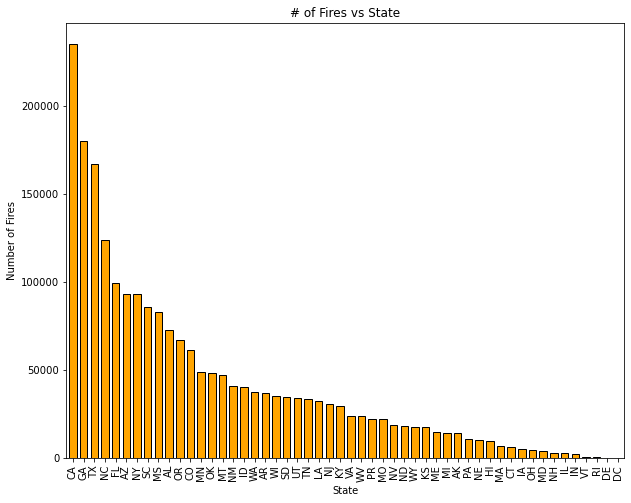

In [5]:
# plot data for fires vs state

fig = plt.figure(figsize=(10, 8))
ax = fires.state.value_counts().plot.bar(width=.7, ec='black', color = 'orange')
ax.set(title='# of Fires vs State', ylabel='Number of Fires', xlabel='State')
plt.savefig("Dist.png")

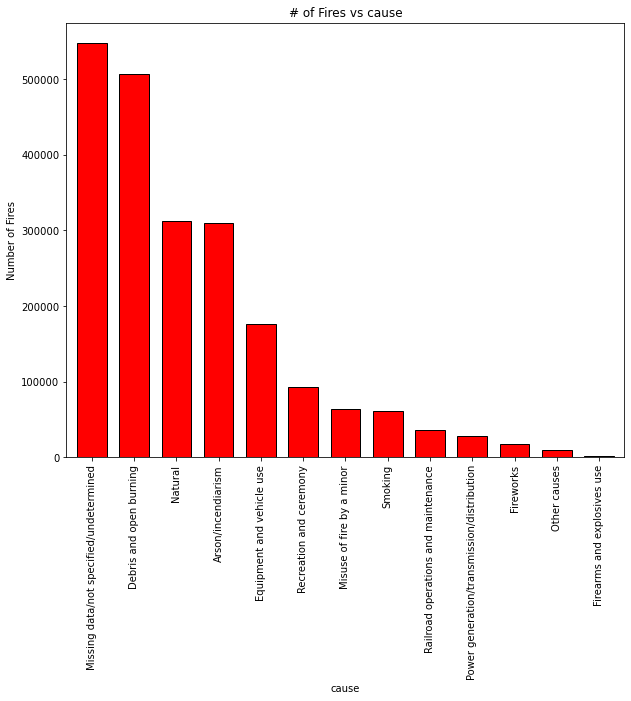

In [6]:
# plotted data for cause of wildfire and # of fires

fig = plt.figure(figsize=(10, 8))
ax = fires.general_cause.value_counts().plot.bar(width=.7, ec='black', color='red')
ax.set(title='# of Fires vs cause', ylabel='Number of Fires', xlabel='cause')
plt.savefig("Dist.png")

# Largest cause of wildfires is unknown
- Debris and open burning, Natural, Arson are causes for most wildfires

In [7]:
sorted_df = fires.sort_values(by=['fire_year'], ascending=True)
sorted_df

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state
696811,1992,1992-05-17,Arson/incendiarism,1992-05-17,2.0000,31.023204,-89.452709,MS
762318,1992,1992-06-14,Debris and open burning,NaT,0.1000,45.637770,-122.241150,WA
762317,1992,1992-06-16,Debris and open burning,NaT,0.1000,45.723490,-121.592050,WA
762316,1992,1992-09-15,Smoking,NaT,2.1000,47.515890,-122.899630,WA
762315,1992,1992-09-10,Other causes,NaT,1.0000,47.441770,-122.830120,WA
...,...,...,...,...,...,...,...,...
2097751,2018,2018-02-04,Missing data/not specified/undetermined,2018-02-04,0.0250,41.144960,-73.934180,NY
2097750,2018,2018-02-04,Missing data/not specified/undetermined,2018-02-04,0.0010,38.490000,-105.324800,CO
2097749,2018,2018-02-04,Missing data/not specified/undetermined,2018-02-04,0.1000,39.124090,-95.637404,KS
2097759,2018,2018-02-04,Missing data/not specified/undetermined,2018-02-04,1.1000,33.990200,-109.188000,AZ


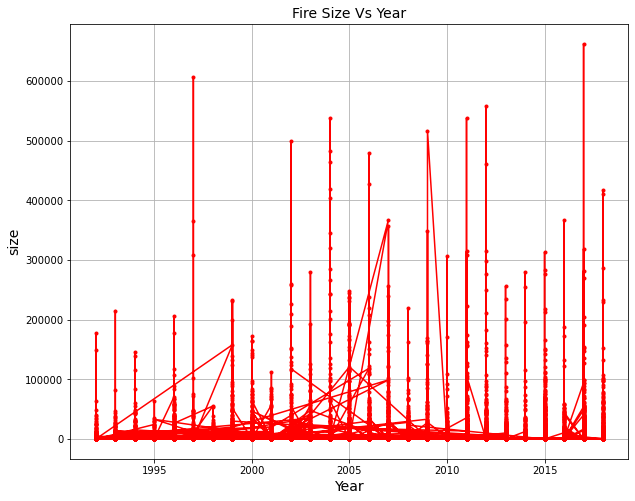

In [8]:
# plot comparison of fire size over span of years

x = fires.fire_year
y = fires.fire_size

fig = plt.figure(figsize=(10, 8))
plt.plot(x, y, color='red', marker='.')
plt.title('Fire Size Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('size', fontsize=14)
plt.grid(True)
plt.show()

[Text(0, 0, '1992'),
 Text(1, 0, '1993'),
 Text(2, 0, '1994'),
 Text(3, 0, '1995'),
 Text(4, 0, '1996'),
 Text(5, 0, '1997'),
 Text(6, 0, '1998'),
 Text(7, 0, '1999'),
 Text(8, 0, '2000'),
 Text(9, 0, '2001'),
 Text(10, 0, '2002'),
 Text(11, 0, '2003'),
 Text(12, 0, '2004'),
 Text(13, 0, '2005'),
 Text(14, 0, '2006'),
 Text(15, 0, '2007'),
 Text(16, 0, '2008'),
 Text(17, 0, '2009'),
 Text(18, 0, '2010'),
 Text(19, 0, '2011'),
 Text(20, 0, '2012'),
 Text(21, 0, '2013'),
 Text(22, 0, '2014'),
 Text(23, 0, '2015'),
 Text(24, 0, '2016'),
 Text(25, 0, '2017'),
 Text(26, 0, '2018')]

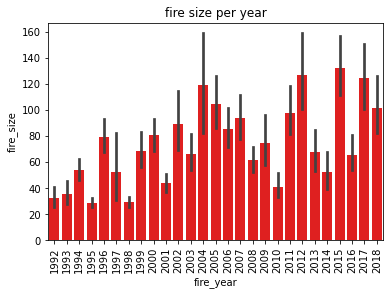

In [9]:
firesizeyear=sns.barplot(x="fire_year", y="fire_size", data=fires,color='red')
firesizeyear.set_title('fire size per year')
firesizeyear.set_xticklabels(firesizeyear.get_xticklabels(),rotation=90)

# Takeaways:

- Top 5 US states with the most wildfires in ascending order are: California, Georgia, Texas, North Carolina, Florida.


- There does not seem to be a consistent trend for the size of fires vs. time, the sizes of the wildfires do not show they are getting bigger or smaller as time progresses.



In [10]:
# overview of dataframe

fires.head()

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA


In [11]:
fires.fire_size.value_counts(normalize = True, ascending=True)



4173.00     4.615201e-07
348.20      4.615201e-07
3195.00     4.615201e-07
94.38       4.615201e-07
89366.00    4.615201e-07
                ...     
0.20        3.774542e-02
2.00        5.577655e-02
0.50        5.800523e-02
1.00        1.172169e-01
0.10        2.493639e-01
Name: fire_size, Length: 17055, dtype: float64

### Do any features strongly correlate with fire size?

Object `relationship` not found.


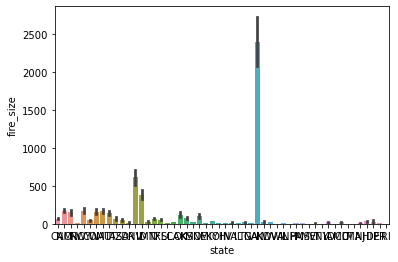

In [12]:
# barplot shows a significantly larger fire in one particular state

sns.barplot(x = 'state',y='fire_size',data=fires)
- Is it a linear relationship or is there no relationship?

In [13]:
# create dataframe sorted by fire size from largest to smallest fire.

sorted_df = fires.sort_values(by=['fire_size'], ascending=False)
sorted_df

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state
2042982,2017,2017-03-07,Missing data/not specified/undetermined,NaT,662700.00000,36.774470,-100.175200,OK
211267,1997,1997-06-25,Natural,1997-09-09,606945.00000,61.982700,-157.085700,AK
1578391,2012,2012-07-08,Natural,2012-07-30,558198.30000,42.391894,-117.893687,OR
1458491,2011,2011-05-29,Recreation and ceremony,2011-07-12,538049.00000,33.606111,-109.449722,AZ
305530,2004,2004-06-13,Natural,2004-09-30,537627.00000,65.266300,-146.885800,AK
...,...,...,...,...,...,...,...,...
537776,2008,2008-07-16,Power generation/transmission/distribution,2008-07-16,0.00010,41.205460,-96.786640,NE
1844100,2015,2015-07-16,Missing data/not specified/undetermined,2015-07-16,0.00010,42.270000,-95.600000,IA
1773809,2014,2014-03-10,Missing data/not specified/undetermined,2014-03-10,0.00010,40.872220,-97.591620,NE
571841,2004,2004-05-12,Misuse of fire by a minor,2004-05-12,0.00009,40.952110,-78.220390,PA


### Largest fire: Occurred in 2017 in the state of Oklahoma and was 55,755 acres more than previously recorded largest fire that occurred in Arkansas in 1997.



# When and where are fires most likely to occur?


In [14]:
fires['day_of_week'] = fires['discovery_date'].dt.day_name()
print(fires['day_of_week'])

0          Wednesday
1          Wednesday
2             Monday
3             Monday
4             Monday
             ...    
2166748      Tuesday
2166749     Saturday
2166750       Sunday
2166751     Thursday
2166752       Monday
Name: day_of_week, Length: 2166753, dtype: object


Text(0.5, 1.0, '# of fires for day of the week')

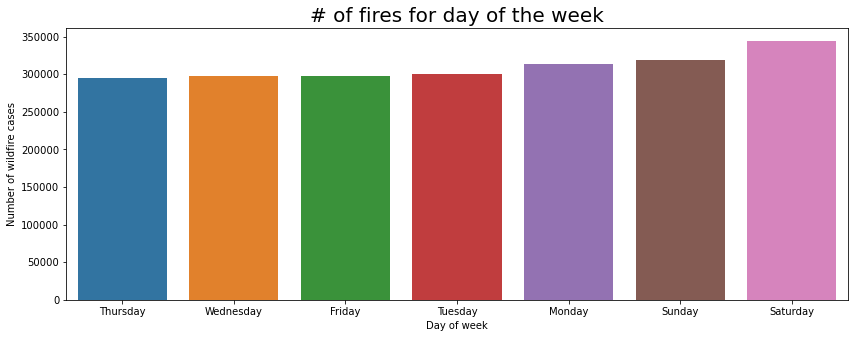

In [15]:
day_of_week = fires.groupby(['day_of_week']).size().reset_index(name = 'count').sort_values('count')

plt.figure(figsize=(14,5))
g = sns.barplot(data = day_of_week, y = 'count', x = 'day_of_week')
plt.xlabel('Day of the week')
plt.ylabel('Number of wildfires')
g.axes.set_title('# of fires for day of the week',fontsize=20)

# Takeaways:

- The number of wildfires occurring is consistent Tuesday-Friday, however there is a significant raise from Saturday-Monday


- I'd like to further explore causes of wildfires for Saturday, Sunday & Monday to see the reason why these days of the week are higher.

In [25]:
arson_over_weekends = fires[fires['general_cause'] == 'Arson/incendiarism'].groupby(['day_of_week']).size().reset_index(name = 'count').sort_values('count')
arson_over_weekends

,day_of_week,count
4,Thursday,41467
0,Friday,41969
6,Wednesday,42119
5,Tuesday,42179
1,Monday,44858
2,Saturday,48074
3,Sunday,49654


Text(0.5, 1.0, 'Graph showing number of wildfire per day of week caused by arson')

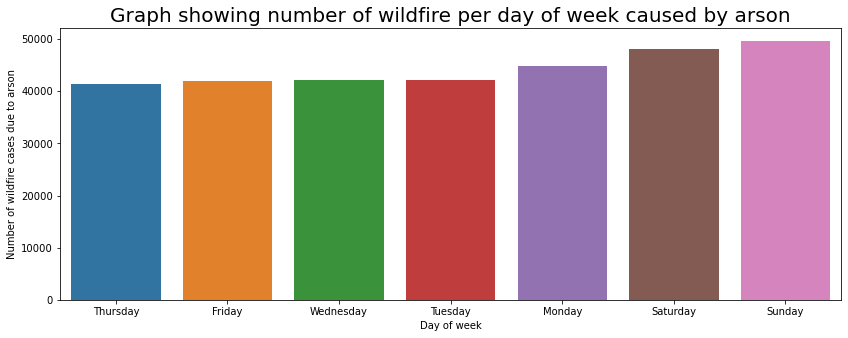

In [26]:

plt.figure(figsize=(14,5))
g = sns.barplot(data = arson_over_weekends, y = 'count', x = 'day_of_week')
plt.xlabel('Day of week')
plt.ylabel('Number of wildfire cases due to arson')
g.axes.set_title('# of wildfire per day of week caused by arson',fontsize=20)

In [28]:
natural_over_weekends = fires[fires['general_cause'] == 'Natural'].groupby(['day_of_week']).size().reset_index(name = 'count').sort_values('count')
natural_over_weekends

,day_of_week,count
3,Sunday,43174
2,Saturday,43361
1,Monday,44337
5,Tuesday,44703
4,Thursday,45418
0,Friday,45432
6,Wednesday,46382


Text(0.5, 1.0, '# of wildfire per day of week caused by natural causes')

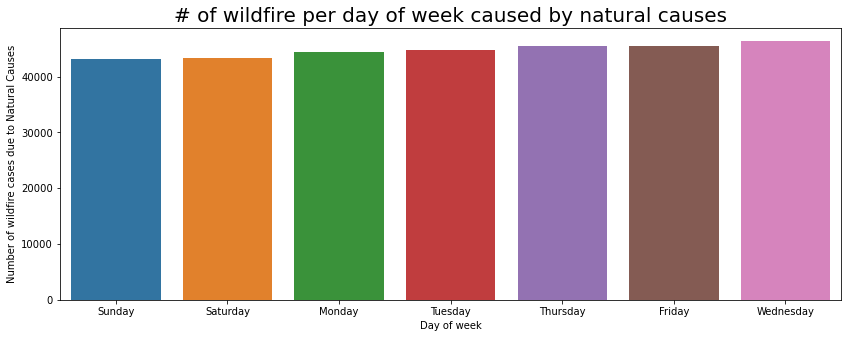

In [31]:

plt.figure(figsize=(14,5))
g = sns.barplot(data = natural_over_weekends, y = 'count', x = 'day_of_week')
plt.xlabel('Day of week')
plt.ylabel('Number of wildfire cases due to Natural Causes')
g.axes.set_title('# of wildfire per day of week caused by natural causes',fontsize=20)

In [30]:
debris_over_weekday = fires[fires['general_cause'] == 'Debris and open burning'].groupby(['day_of_week']).size().reset_index(name = 'count').sort_values('count')
debris_over_weekday

,day_of_week,count
4,Thursday,68412
6,Wednesday,68744
3,Sunday,68914
0,Friday,69238
5,Tuesday,70230
1,Monday,73182
2,Saturday,88499


Text(0.5, 1.0, '# of wildfire per day of week caused by debris and open burning')

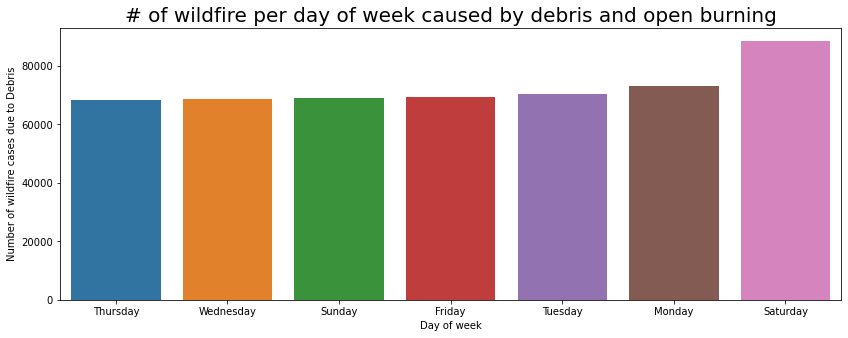

In [33]:

plt.figure(figsize=(14,5))
g = sns.barplot(data = debris_over_weekday, y = 'count', x = 'day_of_week')
plt.xlabel('Day of week')
plt.ylabel('Number of wildfire cases due to Debris')
g.axes.set_title('# of wildfire per day of week caused by debris and open burning',fontsize=20)

# Takeaways pt. 2

- Wildfires caused by Arson/Incendiarism are significantly higher on Saturday-Monday



## Part 2: Where ?

In [36]:
CA_fires = fires[fires['state'] == 'CA']
CA_fires

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,day_of_week
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA,Wednesday
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA,Wednesday
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA,Monday
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA,Monday
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA,Monday
...,...,...,...,...,...,...,...,...,...
2166707,2017,2017-06-29,Missing data/not specified/undetermined,NaT,1200.00,35.957900,-121.270100,CA,Thursday
2166709,2017,2017-08-20,Missing data/not specified/undetermined,NaT,950.00,39.120278,-121.318889,CA,Sunday
2166733,2015,2015-07-05,Missing data/not specified/undetermined,NaT,224.00,35.811944,-118.794167,CA,Sunday
2166740,2015,2015-06-22,Missing data/not specified/undetermined,NaT,164.00,34.342500,-119.065833,CA,Monday
